In [2]:
from SALib import ProblemSpec
from SALib.test_functions import Sobol_G
import numpy as np

import matplotlib.pyplot as plt

In [3]:
def sobol_g_param(n):
    names_arr = []
    a_ar=[]
    delta_ar=[]
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

        a_i = (i-1) / 2
        a_ar.append(a_i)

        delta_ar.append(0)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })
    return sp, a_ar, delta_ar

sp_4, a_arr_4, delta_arr_4 = sobol_g_param(4)
sp_40, a_arr_40, delta_arr_40 = sobol_g_param(40)
sp_400, a_arr_400, delta_arr_400 = sobol_g_param(400)

# Sobol Indices

In [17]:
%%time
# ==== Sobol Indices ~ Sobol G-Function ===
def si_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list, log_bool=False):

    (sp.sample_sobol(1024, calc_second_order=False).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_sobol(calc_second_order=False))
    
    print(sp)

    # === Plotting results ===
    axes = sp.plot()
    if log_bool:
        axes[0].set_yscale('log') # set plot to log scale
        axes[1].set_yscale('log') # set plot to log scale

    for axis in axes:
        axis.set_title(label=f"Sobol Indices - Sobol G Function - {n} inputs", size=20)
        axis.tick_params(axis='y', labelsize=30)
        if n < 100:
            axis.tick_params(axis='x', labelsize=30)
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 10)
    plt.tight_layout()

    sp.heatmap(title=f"Sobol Indices - {n} inputs ")

CPU times: user 5 μs, sys: 0 ns, total: 5 μs
Wall time: 7.63 μs


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	6144 samples
Outputs:
	1 outputs: ['Y']
	6144 evaluations
Analysis:
          ST   ST_conf
x0  0.778553  0.112562
x1  0.339527  0.057820
x2  0.175496  0.039039
x3  0.104139  0.022224
          S1   S1_conf
x0  0.466161  0.074735
x1  0.112367  0.048836
x2  0.051349  0.036488
x3  0.030122  0.038621



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


CPU times: user 539 ms, sys: 179 ms, total: 718 ms
Wall time: 507 ms


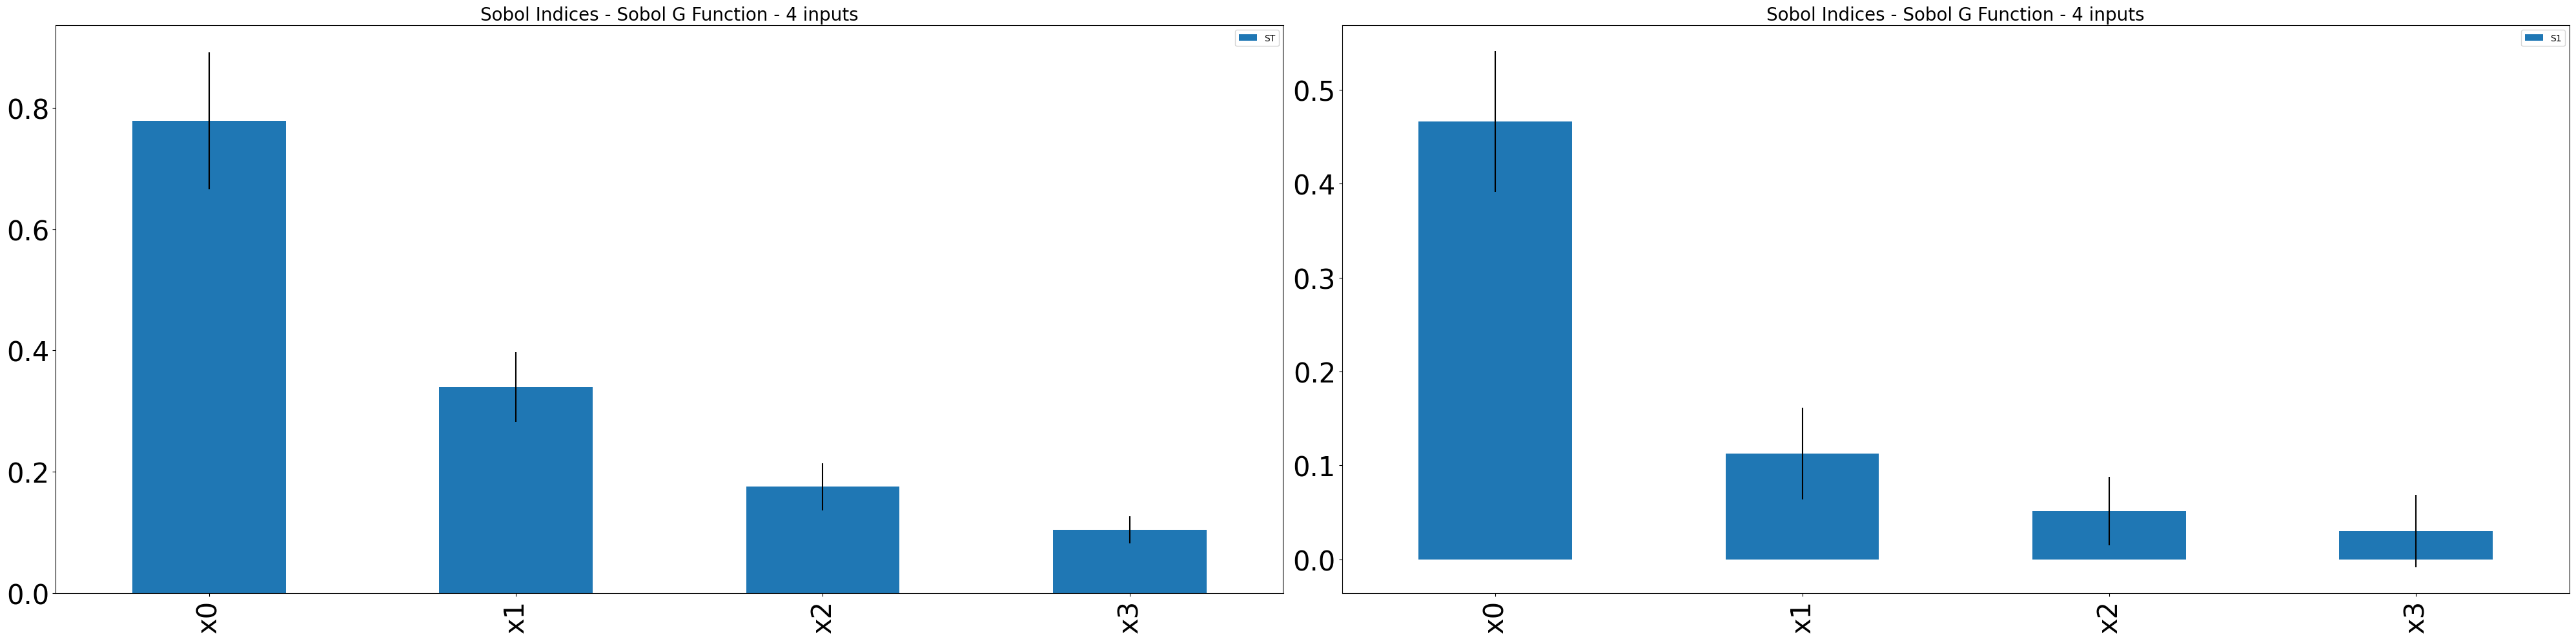

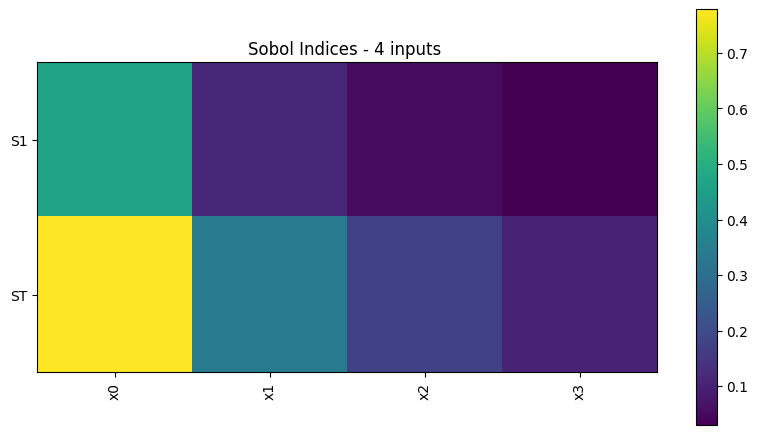

In [18]:
%%time
si_sobol_g(4, sp_4, a_arr_4, delta_arr_4)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	43008 samples
Outputs:
	1 outputs: ['Y']
	43008 evaluations
Analysis:
           ST   ST_conf
x0   0.662908  0.127863
x1   0.326531  0.107219
x2   0.159875  0.042393
x3   0.089634  0.025707
x4   0.048782  0.010922
x5   0.040127  0.010963
x6   0.035544  0.010291
x7   0.024295  0.007430
x8   0.024853  0.007636
x9   0.016526  0.005501
x10  0.016829  0.007784
x11  0.012886  0.005410
x12  0.008091  0.002160
x13  0.007688  0.002404
x14  0.005901  0.001436
x15  0.007666  0.003475
x16  0.004920  0.001325
x17  0.004962  0.001321
x18  0.004371  0.001163
x19  0.004340  0.001727
x20  0.003850  0.001320
x21  0.003306  0.000824
x22  0.003542  0.000855
x23  0.003484  0.001383
x24  0.002830  0.000820
x25  0.00

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


CPU times: user 1.19 s, sys: 180 ms, total: 1.37 s
Wall time: 1.12 s


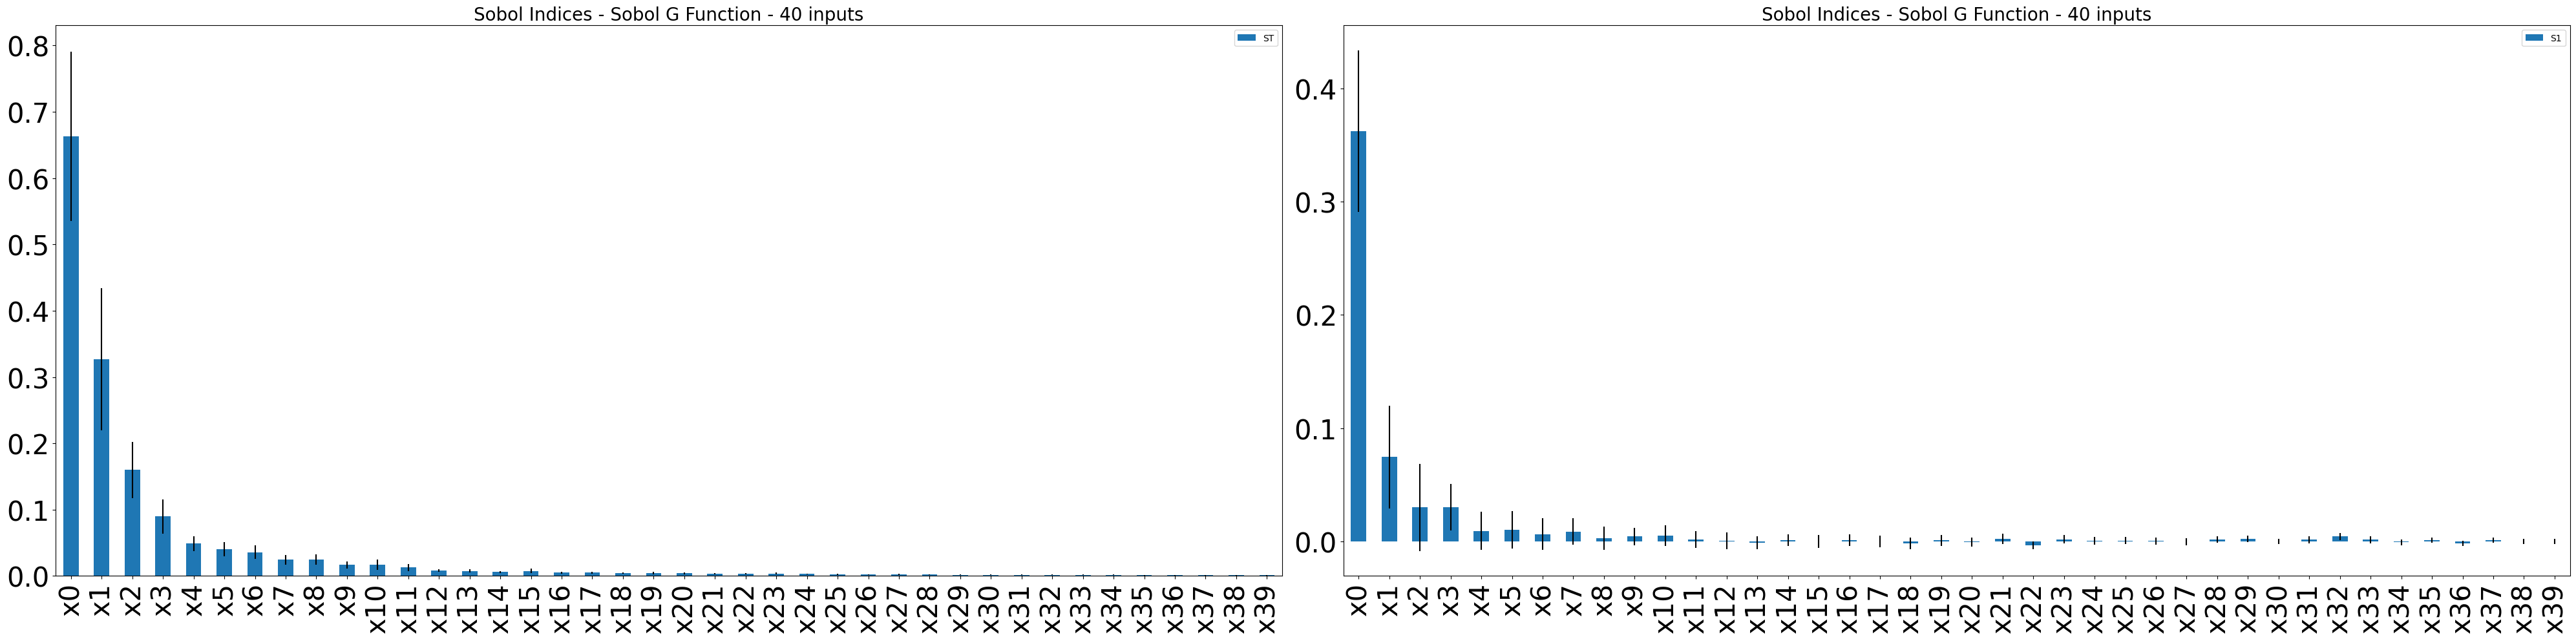

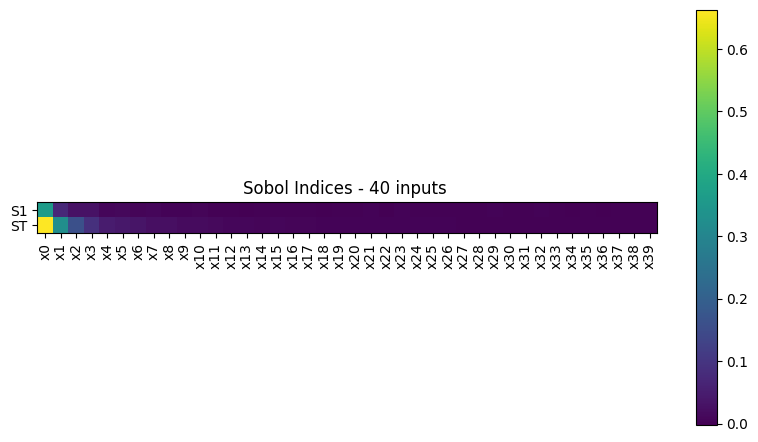

In [9]:
%%time
si_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


CPU times: user 40.5 s, sys: 2.23 s, total: 42.8 s
Wall time: 42.5 s


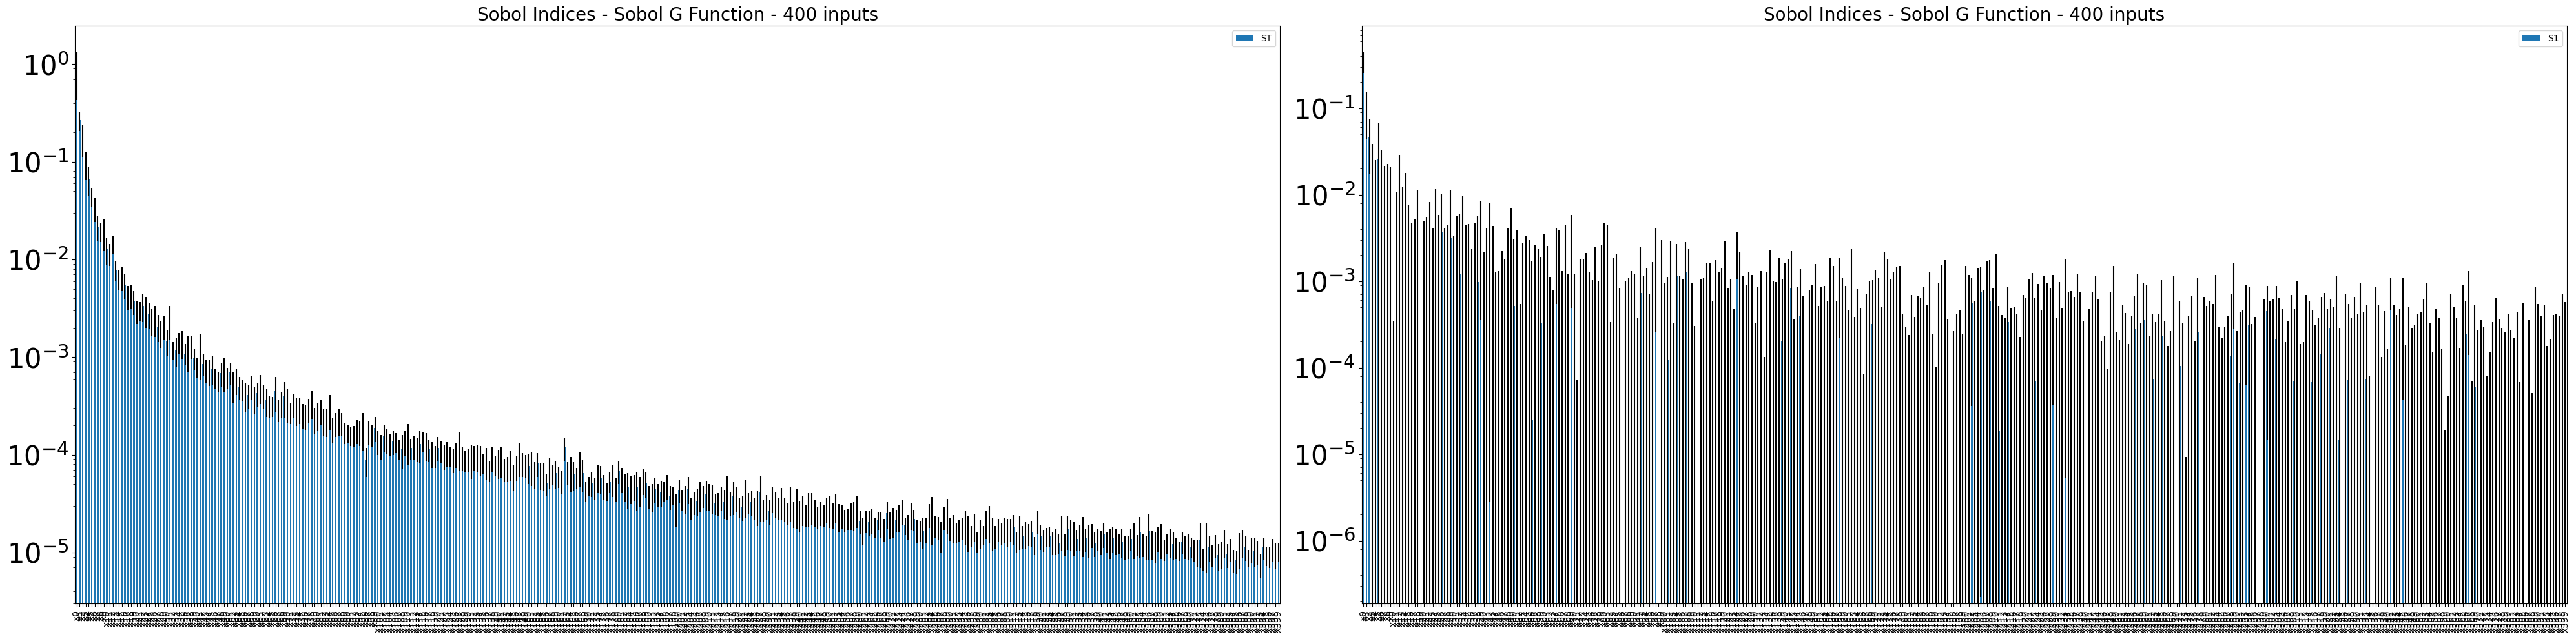

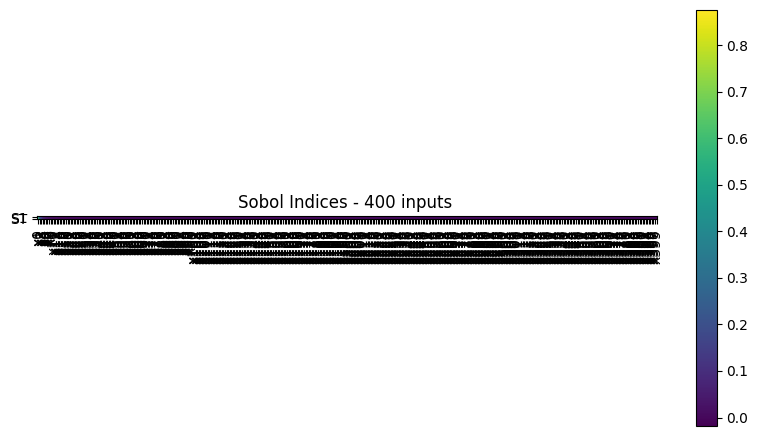

In [14]:
%%time
si_sobol_g(400, sp_400, a_arr_400, delta_arr_400, True)

# FAST

In [25]:
%%time
# ==== FAST ~ Sobol G-Function ===
def fast_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list, log_bool=False):

    (sp.sample_fast(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_fast())   
    
    print(sp)

    # === Plotting results ===
    axes = sp.plot()
    if log_bool:
        axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 8)
    plt.title(label=f"FAST - Sobol G Function - {n} inputs")
    plt.yticks(fontsize=30)
    if n < 100:
        plt.xticks(fontsize=30)
    plt.tight_layout()



CPU times: user 7 μs, sys: 0 ns, total: 7 μs
Wall time: 9.3 μs


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	4096 samples
Outputs:
	1 outputs: ['Y']
	4096 evaluations
Analysis:
          S1        ST   S1_conf   ST_conf
x0  0.434528  0.772389  0.014617  0.038794
x1  0.111586  0.339735  0.015098  0.036682
x2  0.045950  0.175310  0.016711  0.042110
x3  0.025427  0.101871  0.013653  0.039974

CPU times: user 167 ms, sys: 39.8 ms, total: 207 ms
Wall time: 143 ms


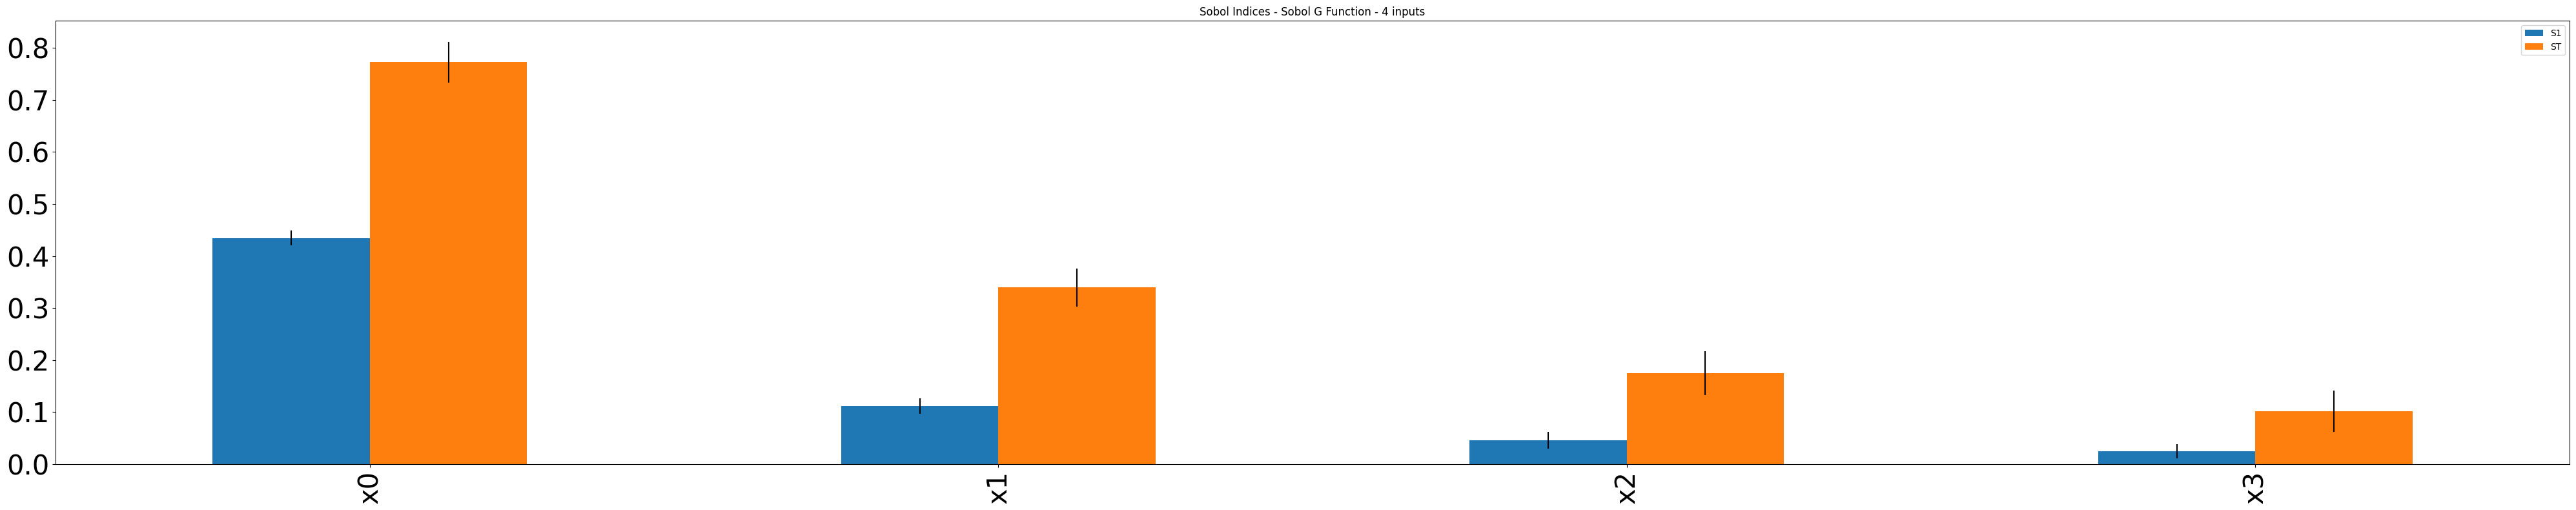

In [26]:
%%time
fast_sobol_g(4, sp_4, a_arr_4, delta_arr_4)

Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	40960 samples
Outputs:
	1 outputs: ['Y']
	40960 evaluations
Analysis:
           S1        ST   S1_conf   ST_conf
x0   0.086554  0.685813  0.015930  0.042831
x1   0.046314  0.328546  0.015067  0.038594
x2   0.009115  0.135907  0.013597  0.033626
x3   0.008551  0.106640  0.012739  0.041494
x4   0.004209  0.063560  0.013429  0.038734
x5   0.018586  0.052241  0.016754  0.037847
x6   0.020744  0.051393  0.014983  0.043471
x7   0.006764  0.025190  0.014148  0.042828
x8   0.015243  0.036327  0.012689  0.039134
x9   0.000402  0.050503  0.014456  0.034294
x10  0.009762  0.025281  0.012689  0.039570
x11  0.005926  0.017160  0.015794  0.039443
x12  0.008225  0.019381  0.013289  0.038529
x13  0.004674  0.

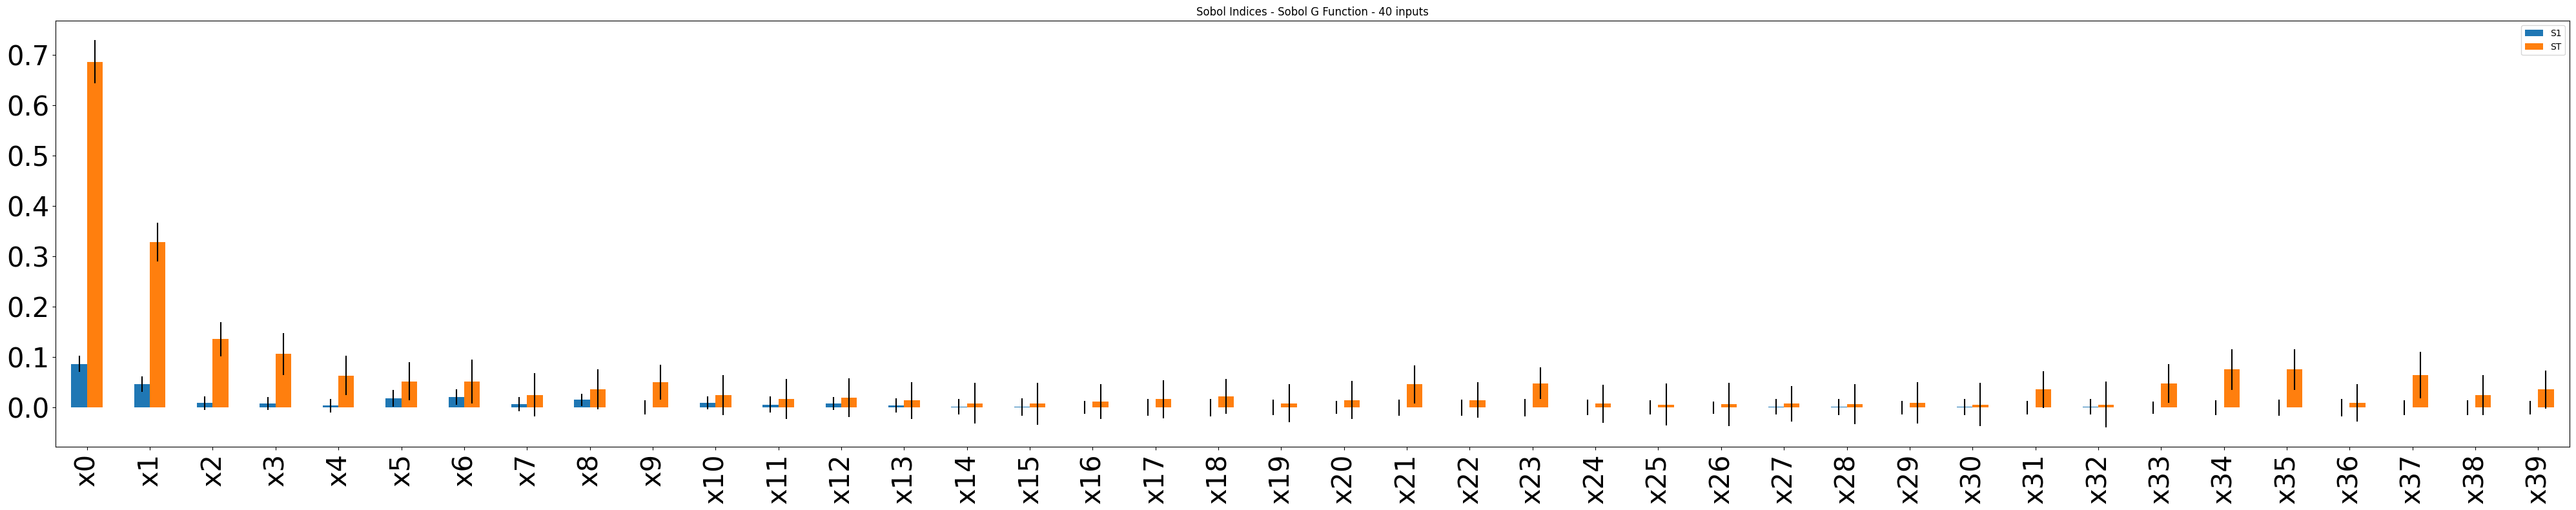

In [27]:
%%time
fast_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

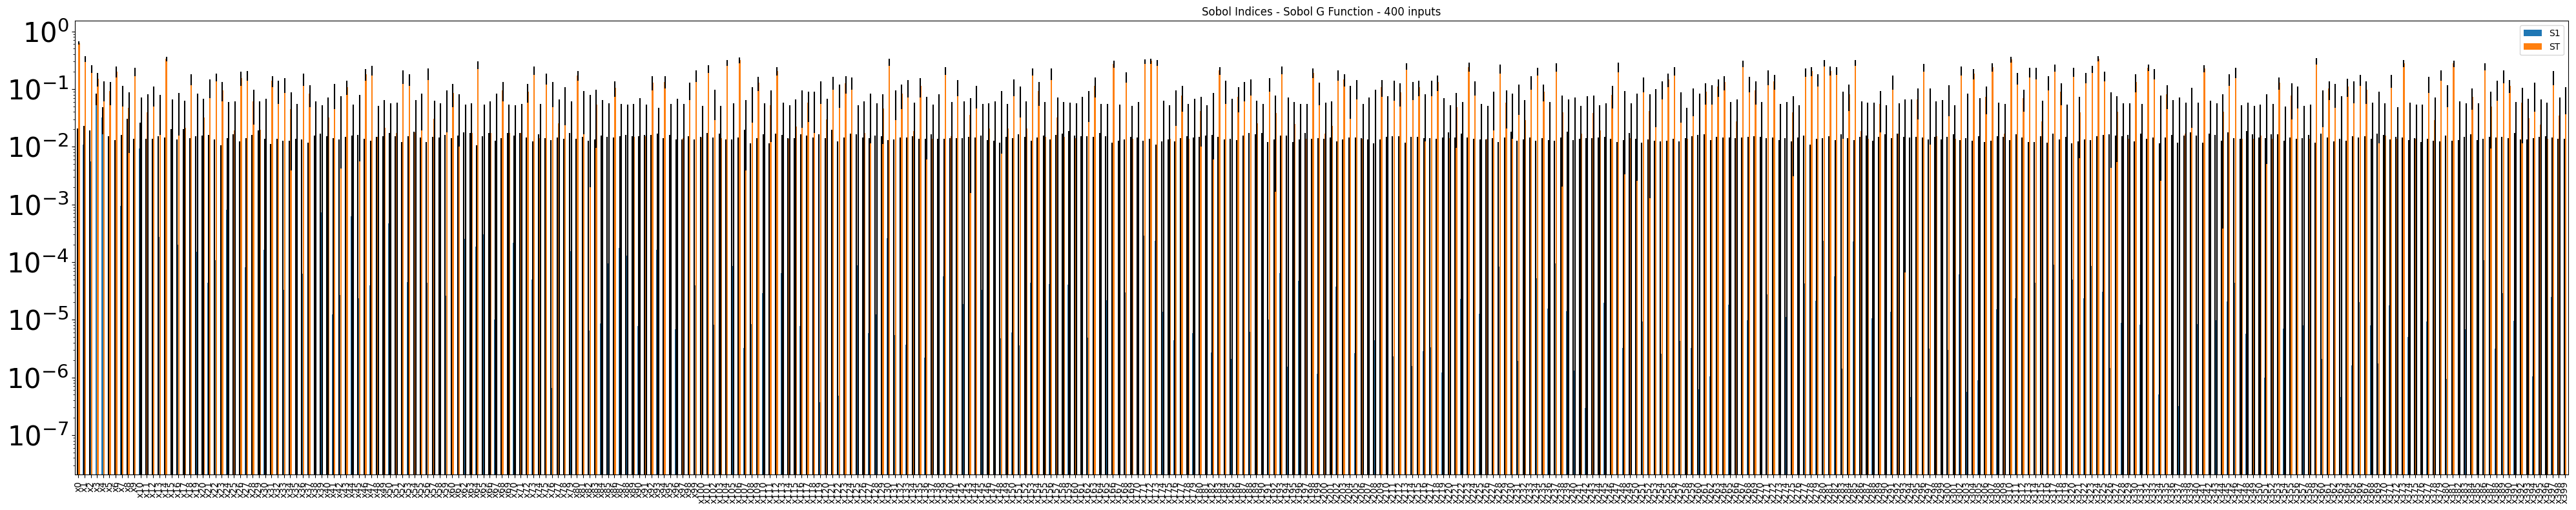

In [36]:
%%time
fast_sobol_g(400, sp_400, a_arr_400, delta_arr_400, True)

# RBD-FAST

In [31]:
%%time
# ==== RBD-FAST ~ Sobol G-Function ===
def rbd_fast_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list, log_bool=False):

    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_rbd_fast())   
    
    print(sp)

    # === Plotting results ===
    axes = sp.plot()
    if log_bool:
        axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 8)
    plt.title(label=f"RBD-FAST - Sobol G Function - {n} inputs", size=20)
    plt.yticks(fontsize=30)
    if n < 100:
        plt.xticks(fontsize=30)
    plt.tight_layout()

CPU times: user 6 μs, sys: 0 ns, total: 6 μs
Wall time: 9.06 μs


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
          S1   S1_conf
x0  0.497340  0.058982
x1  0.118333  0.056389
x2  0.027289  0.038392
x3  0.018580  0.030722

CPU times: user 104 ms, sys: 39.5 ms, total: 143 ms
Wall time: 104 ms


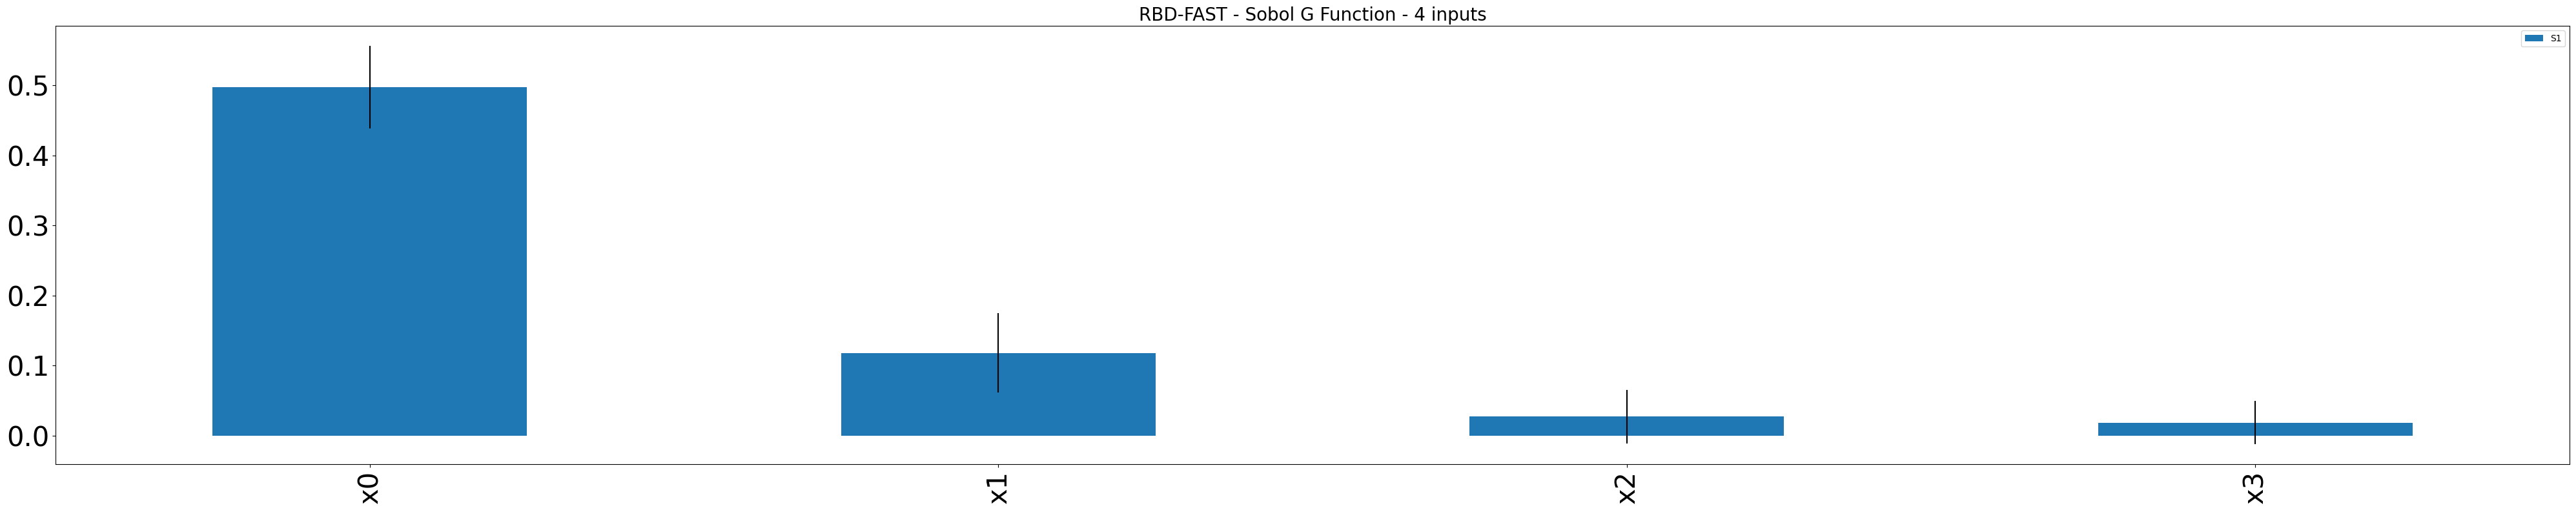

In [32]:
%%time
rbd_fast_sobol_g(4, sp_4, a_arr_4, delta_arr_4)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
           S1   S1_conf
x0   0.333060  0.079706
x1   0.111556  0.056428
x2   0.039056  0.038807
x3   0.019376  0.035289
x4   0.025172  0.032807
x5   0.009951  0.025634
x6  -0.005145  0.025418
x7   0.005481  0.033302
x8   0.005970  0.032145
x9  -0.003032  0.026135
x10 -0.000102  0.025505
x11  0.003436  0.032553
x12 -0.005385  0.021835
x13 -0.001006  0.023937
x14  0.003250  0.026521
x15  0.003407  0.023512
x16  0.002611  0.022250
x17  0.000349  0.033025
x18 -0.003317  0.028458
x19 -0.001937  0.022552
x20 -0.005229  0.027222
x21  0.003395  0.028159
x22 -0.007520  0.030417
x23  0.001238  0.024554
x24 -0.000865  0.023309
x25  0.0102

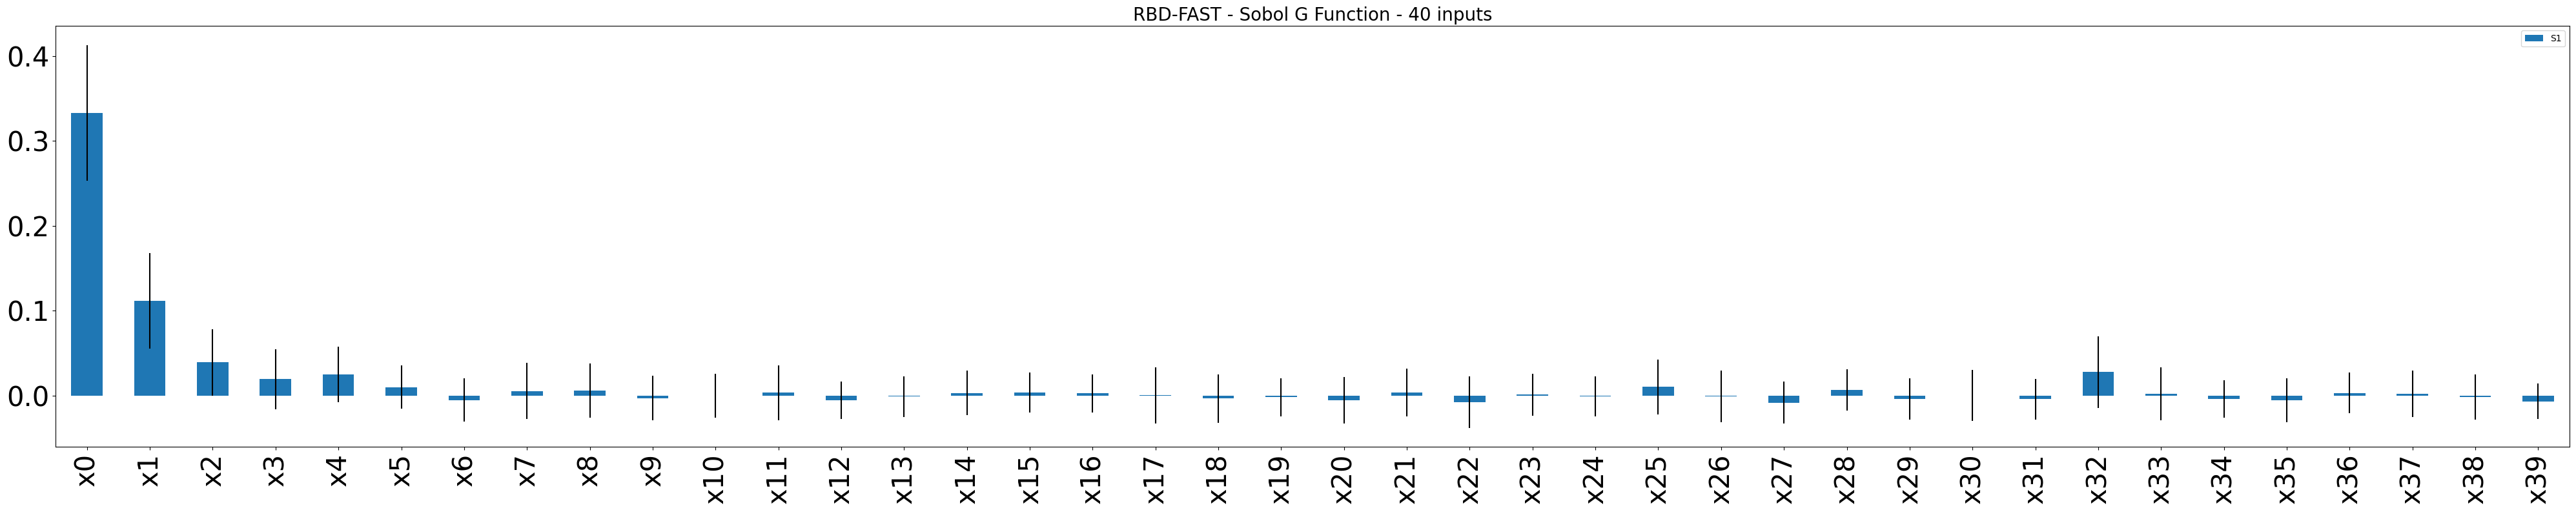

In [33]:
%%time
rbd_fast_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

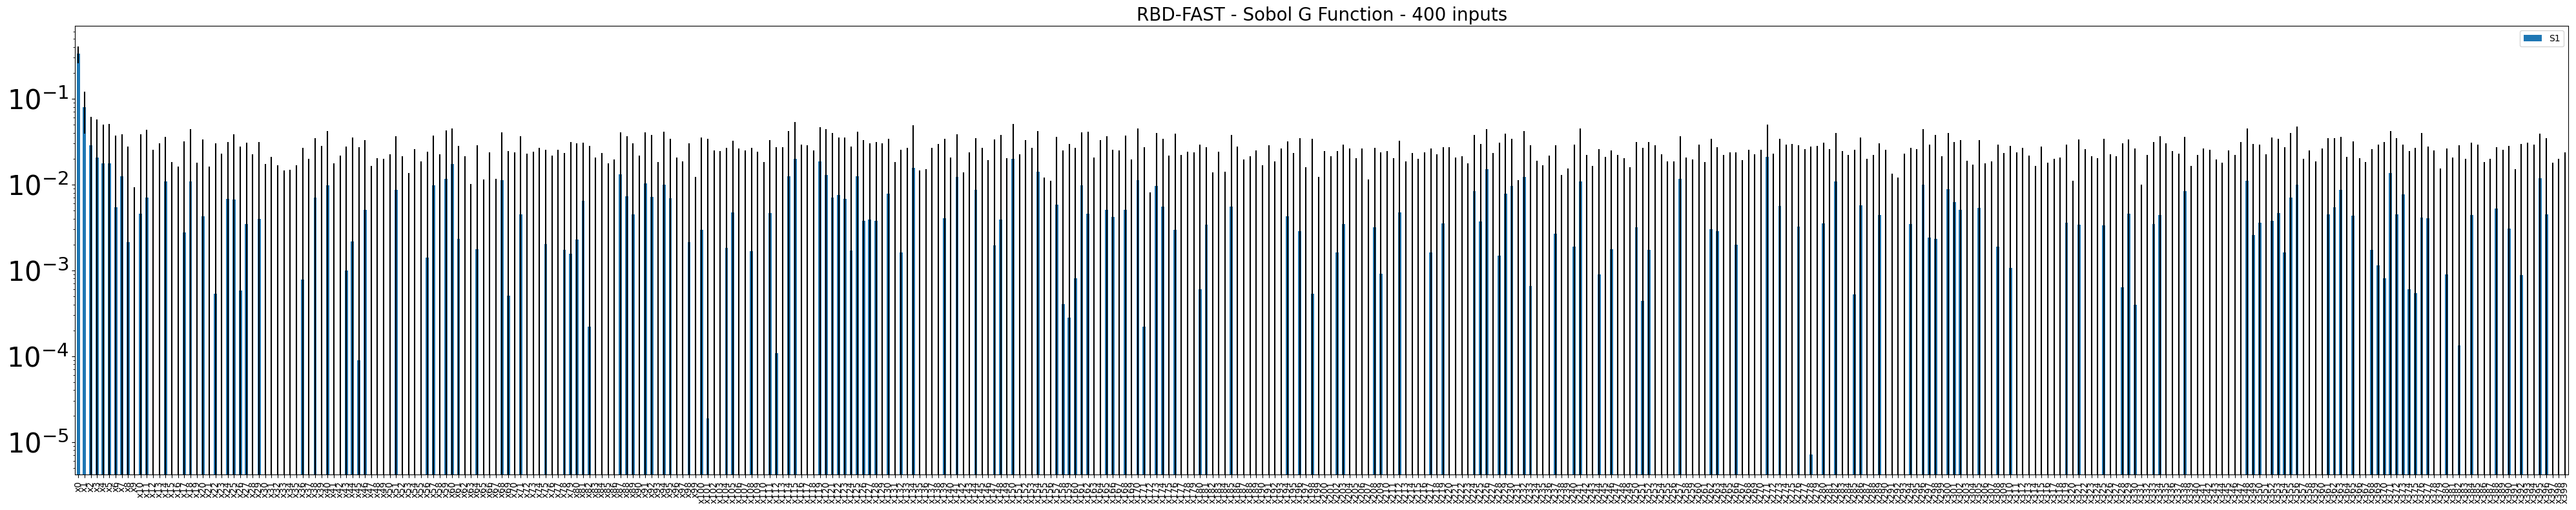

In [35]:
%%time
rbd_fast_sobol_g(400, sp_400, a_arr_400, delta_arr_400, True)

# Delta Moment-Independence

In [43]:
%%time
# ==== Delta ~ Sobol G-Function ===
def delta_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list, log_bool=False):

    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_delta())   
    
    print(sp)

    # === Plotting results ===
    axes = sp.plot()
    if log_bool:
        axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 8)
    plt.title(label=f"Delta - Sobol G Function - {n} inputs", size=20)
    plt.yticks(fontsize=30)
    if n < 100:
        plt.xticks(fontsize=30)
    plt.tight_layout()



CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 5.25 μs


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
       delta  delta_conf        S1   S1_conf
x0  0.365228    0.020831  0.451547  0.033020
x1  0.255996    0.021482  0.094395  0.030934
x2  0.167488    0.021469  0.056890  0.022138
x3  0.125859    0.018903  0.012107  0.017519

CPU times: user 1min 3s, sys: 198 ms, total: 1min 3s
Wall time: 4.02 s


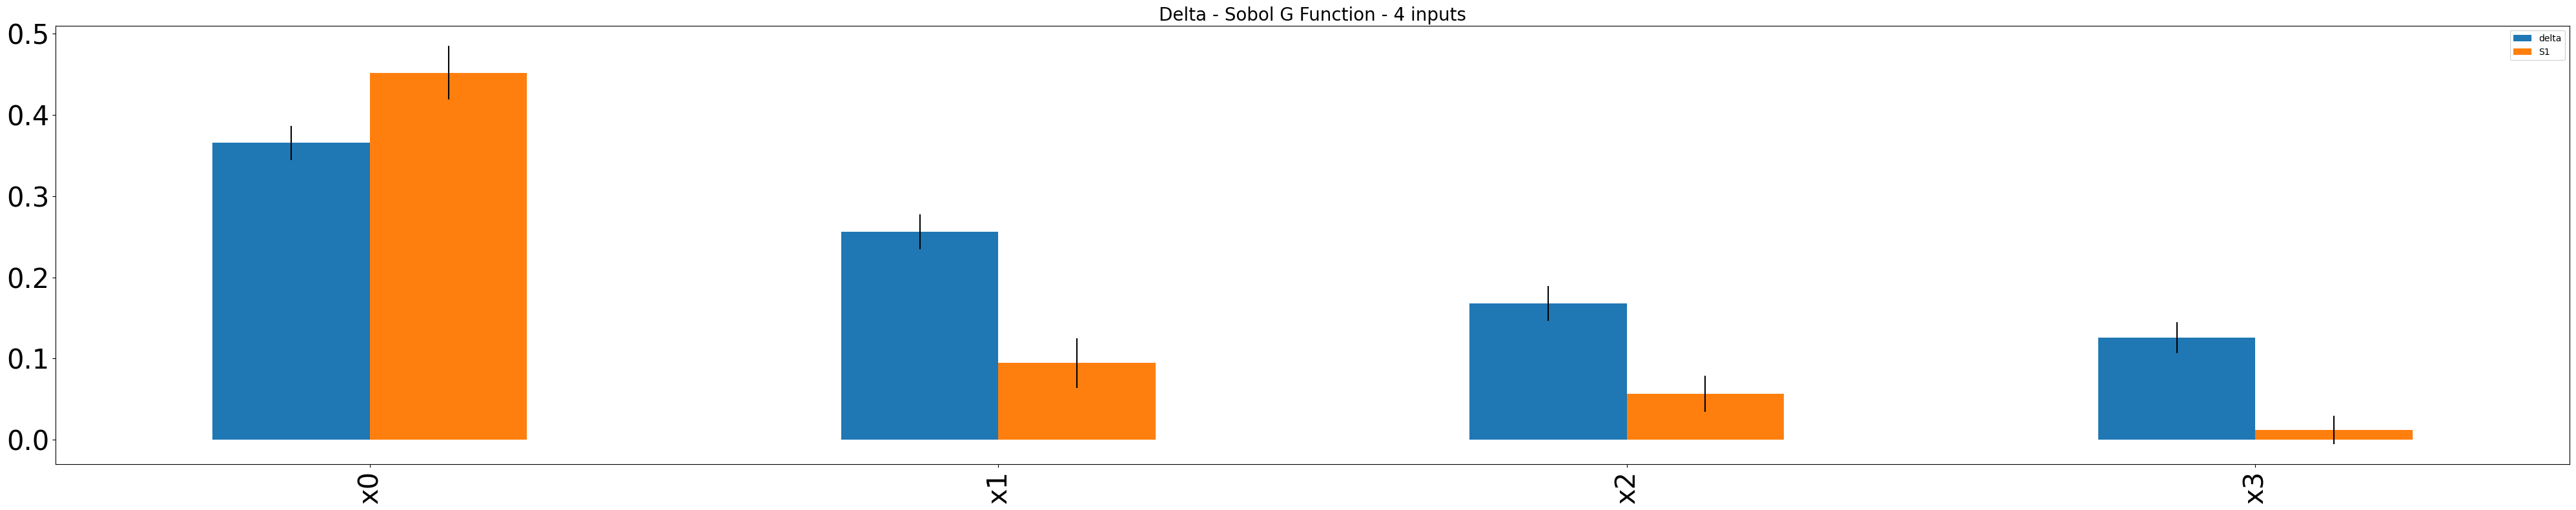

In [44]:
%%time
delta_sobol_g(4, sp_4, a_arr_4, delta_arr_4)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
        delta  delta_conf        S1   S1_conf
x0   0.346098    0.024868  0.289397  0.038453
x1   0.229997    0.025648  0.078901  0.029567
x2   0.168123    0.023758  0.068190  0.022450
x3   0.109206    0.024944  0.023618  0.014998
x4   0.116437    0.019861  0.011545  0.012557
x5   0.103478    0.019731  0.036020  0.015735
x6   0.112411    0.019922  0.018304  0.013257
x7   0.104265    0.024569  0.018021  0.014872
x8   0.105755    0.016249  0.011002  0.010328
x9   0.075754    0.015319  0.019274  0.014237
x10  0.089104    0.013598  0.005899  0.009814
x11  0.095000    0.015125  0.009639  0.009293
x12  0.122209    0.015365  0.003835  

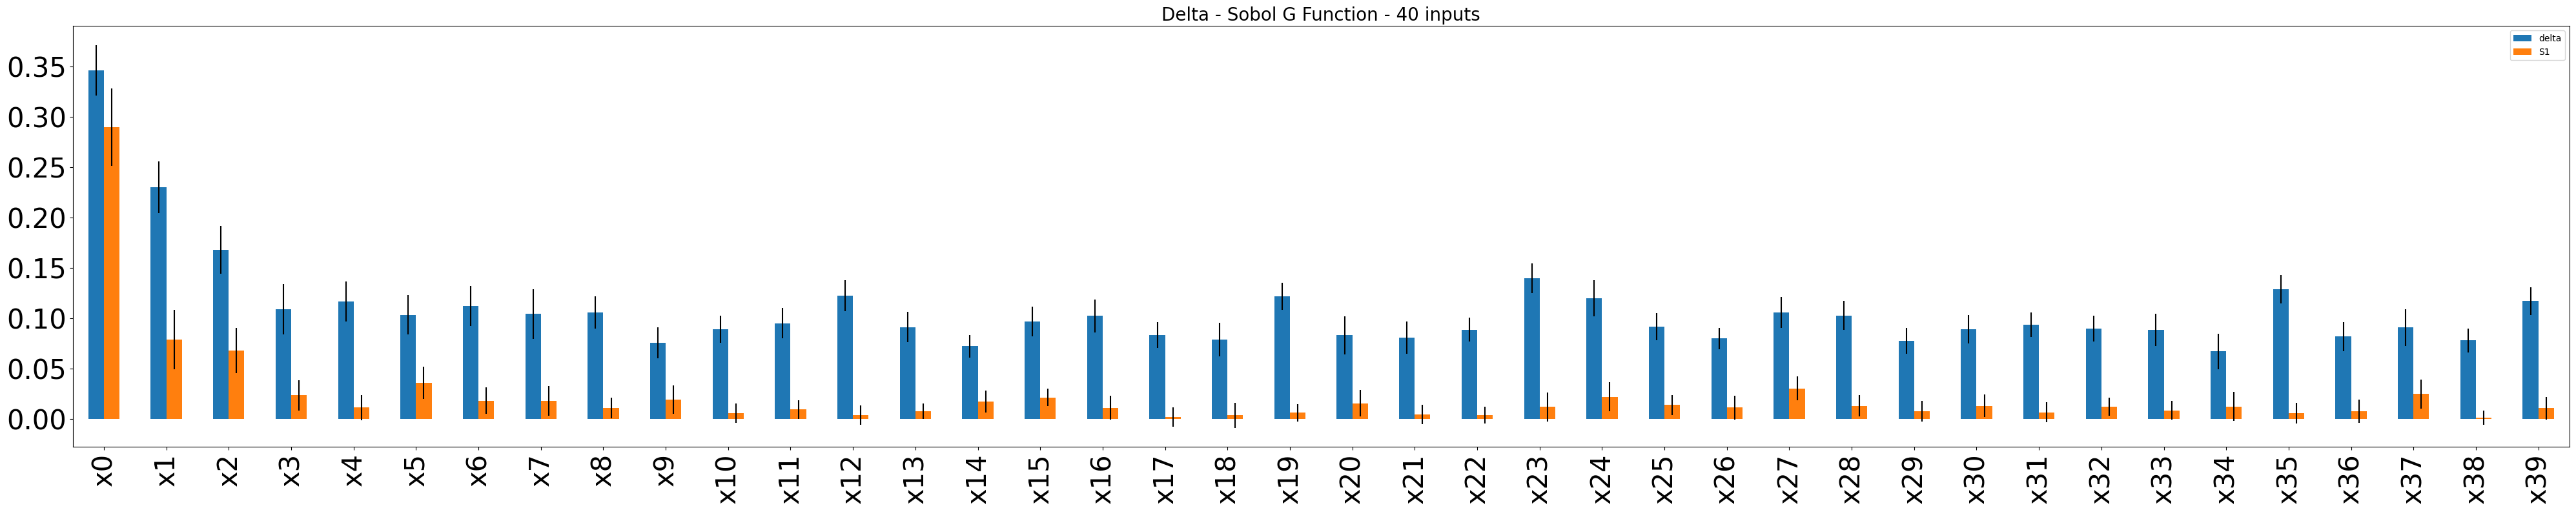

In [45]:
%%time
delta_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

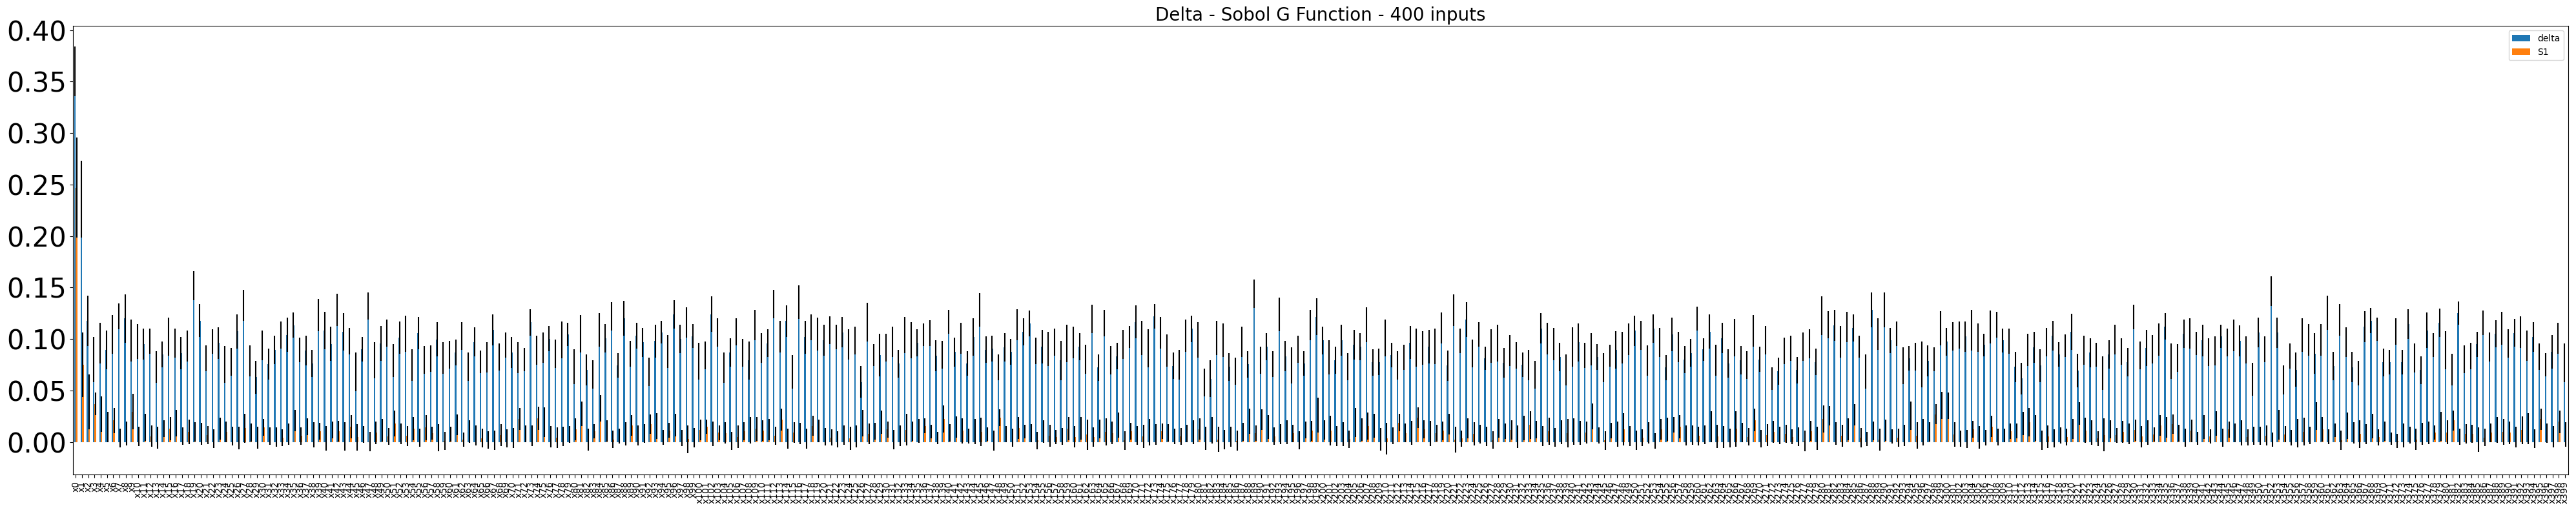

In [46]:
%%time
delta_sobol_g(400, sp_400, a_arr_400, delta_arr_400)

# PAWN

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
      minimum      mean    median   maximum        CV
x0   0.251953  0.420712  0.353738  0.752930  0.413613
x1   0.098729  0.186540  0.127997  0.375517  0.550103
x2   0.069815  0.139182  0.124828  0.255955  0.402758
x3   0.058402  0.106408  0.095119  0.178845  0.395193
x4   0.037301  0.096168  0.098021  0.152600  0.362888
x5   0.061258  0.090582  0.084585  0.149797  0.282150
x6   0.072285  0.093413  0.089279  0.130515  0.186260
x7   0.068915  0.104310  0.091873  0.199247  0.346438
x8   0.064472  0.077213  0.075214  0.096556  0.126097
x9   0.048136  0.082271  0.073171  0.122760  0.312007
x10  0.059762  0.082923  0.075625  0.1327

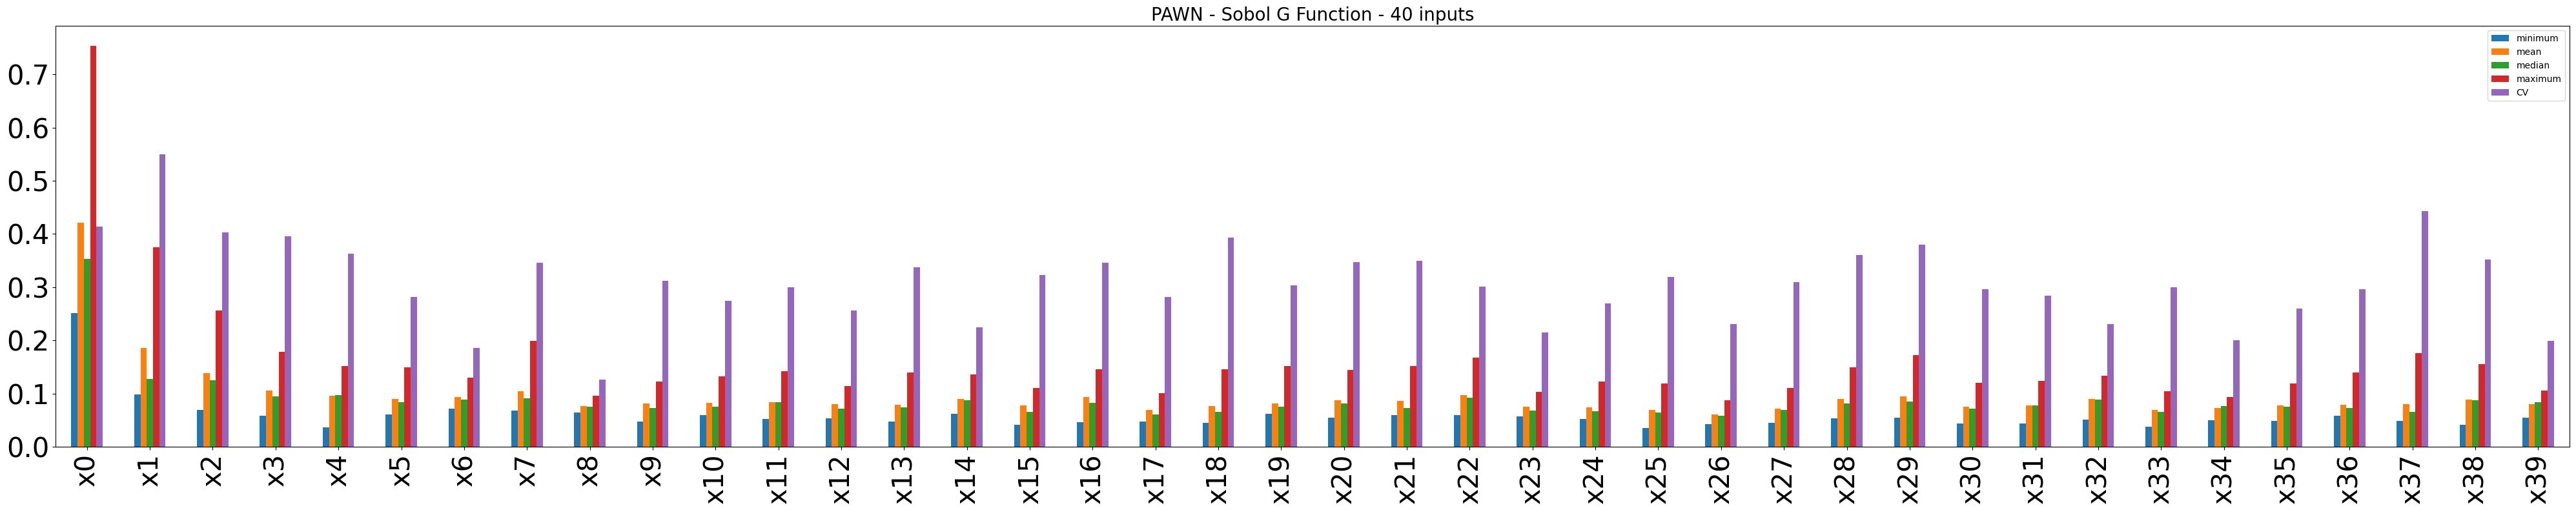

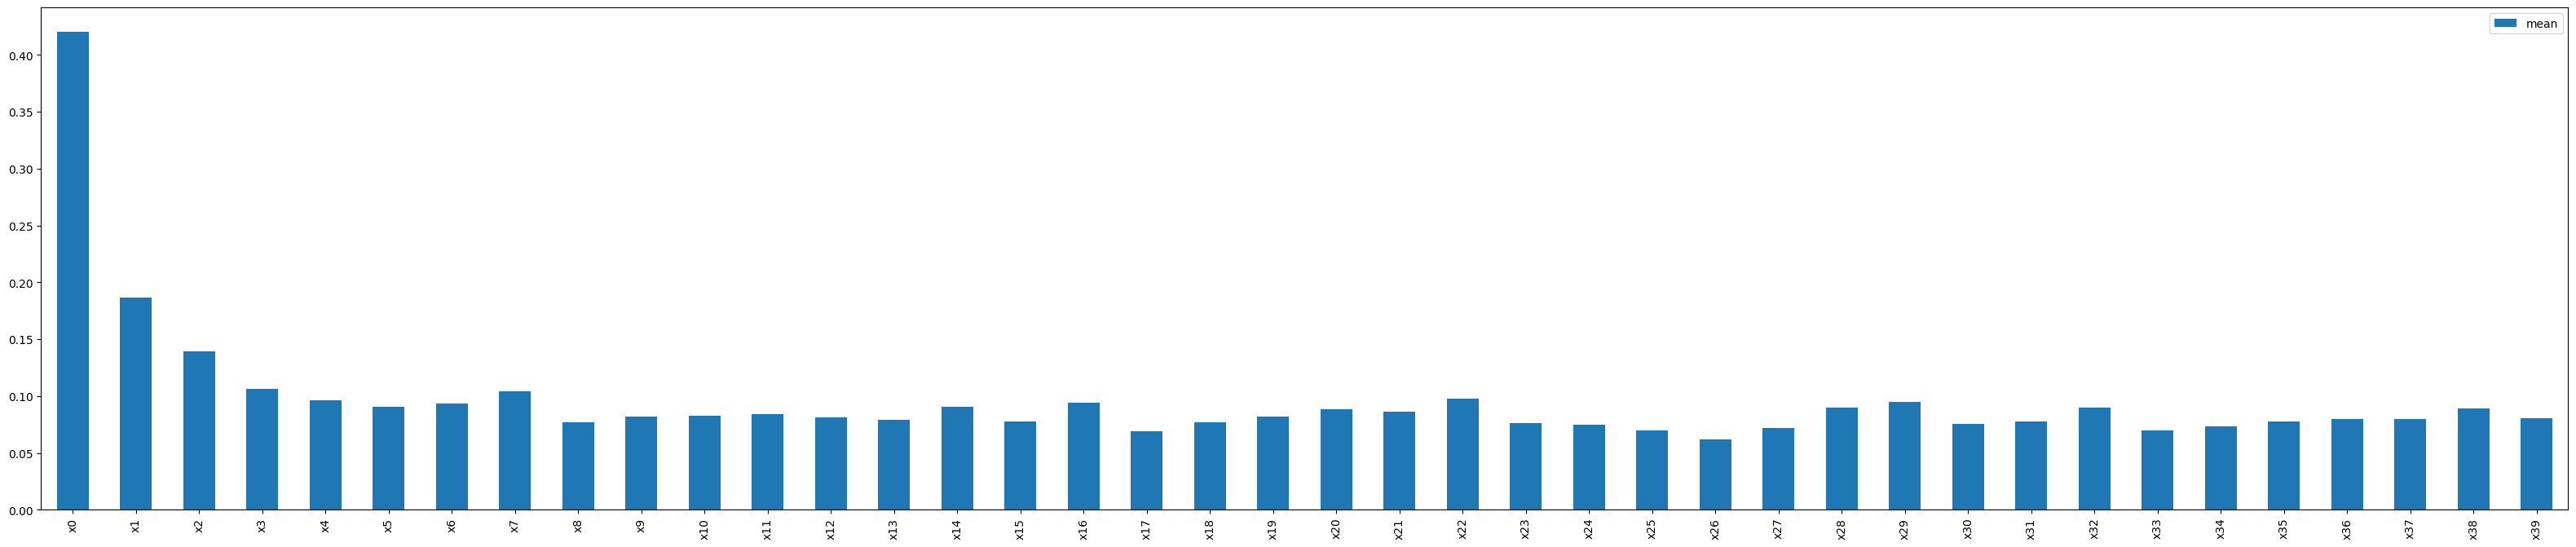

In [88]:
%%time
# ==== PAWN ~ Sobol G-Function ===
def pawn_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list, log_bool=False):

    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_pawn())   
    
    print(sp)
    print(type(sp))

    df = sp.to_df() # convert to pandas dataframe object
    print("\n ----- dataframe: ", df)
    print(df["mean"])

    # === Plotting results ===

    axes = sp.plot()
    if log_bool:
        axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 8)
    plt.title(label=f"PAWN - Sobol G Function - {n} inputs", size=20)
    plt.yticks(fontsize=30)
    if n < 100:
        plt.xticks(fontsize=30)
    plt.tight_layout()
    
    df.plot.bar(y="mean", figsize=(40, 8))

pawn_sobol_g(40, sp_40, a_arr_40, delta_arr_40)
# pawn_sobol_g(4, sp_4, a_arr_4, delta_arr_4)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
     minimum      mean    median   maximum        CV
x0  0.284620  0.432432  0.374769  0.757812  0.388671
x1  0.110562  0.206264  0.171450  0.360639  0.401682
x2  0.085286  0.123142  0.118604  0.179381  0.261312
x3  0.068701  0.122434  0.116919  0.172017  0.314965

dataframe:       minimum      mean    median   maximum        CV
x0  0.284620  0.432432  0.374769  0.757812  0.388671
x1  0.110562  0.206264  0.171450  0.360639  0.401682
x2  0.085286  0.123142  0.118604  0.179381  0.261312
x3  0.068701  0.122434  0.116919  0.172017  0.314965
CPU times: user 97.3 ms, sys: 59.8 ms, total: 157 ms
Wall time: 111 ms


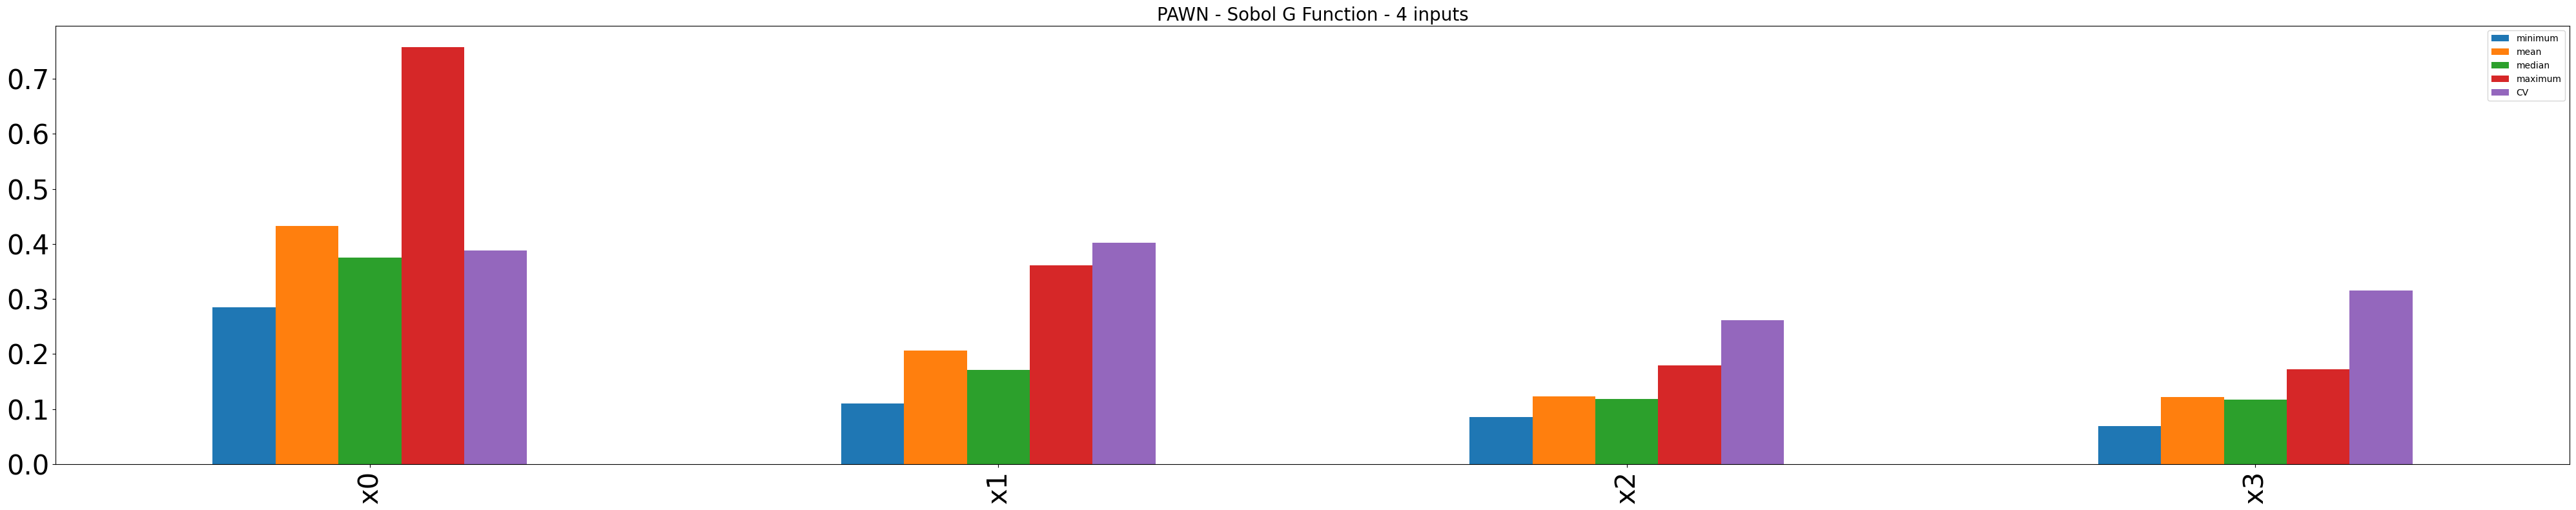

In [53]:
%%time
pawn_sobol_g(4, sp_4, a_arr_4, delta_arr_4)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
      minimum      mean    median   maximum        CV
x0   0.261604  0.422442  0.362104  0.758789  0.406215
x1   0.103975  0.208127  0.194154  0.373717  0.439231
x2   0.062289  0.116192  0.092544  0.219344  0.441864
x3   0.061466  0.089112  0.086052  0.124770  0.215354
x4   0.049288  0.089662  0.090945  0.138538  0.327941
x5   0.062007  0.100609  0.099303  0.159658  0.271365
x6   0.066579  0.100734  0.088264  0.151054  0.257668
x7   0.042643  0.077578  0.074196  0.108877  0.277383
x8   0.048407  0.089182  0.079630  0.148466  0.399570
x9   0.050092  0.073879  0.064631  0.114066  0.311288
x10  0.040124  0.085894  0.085784  0.1392

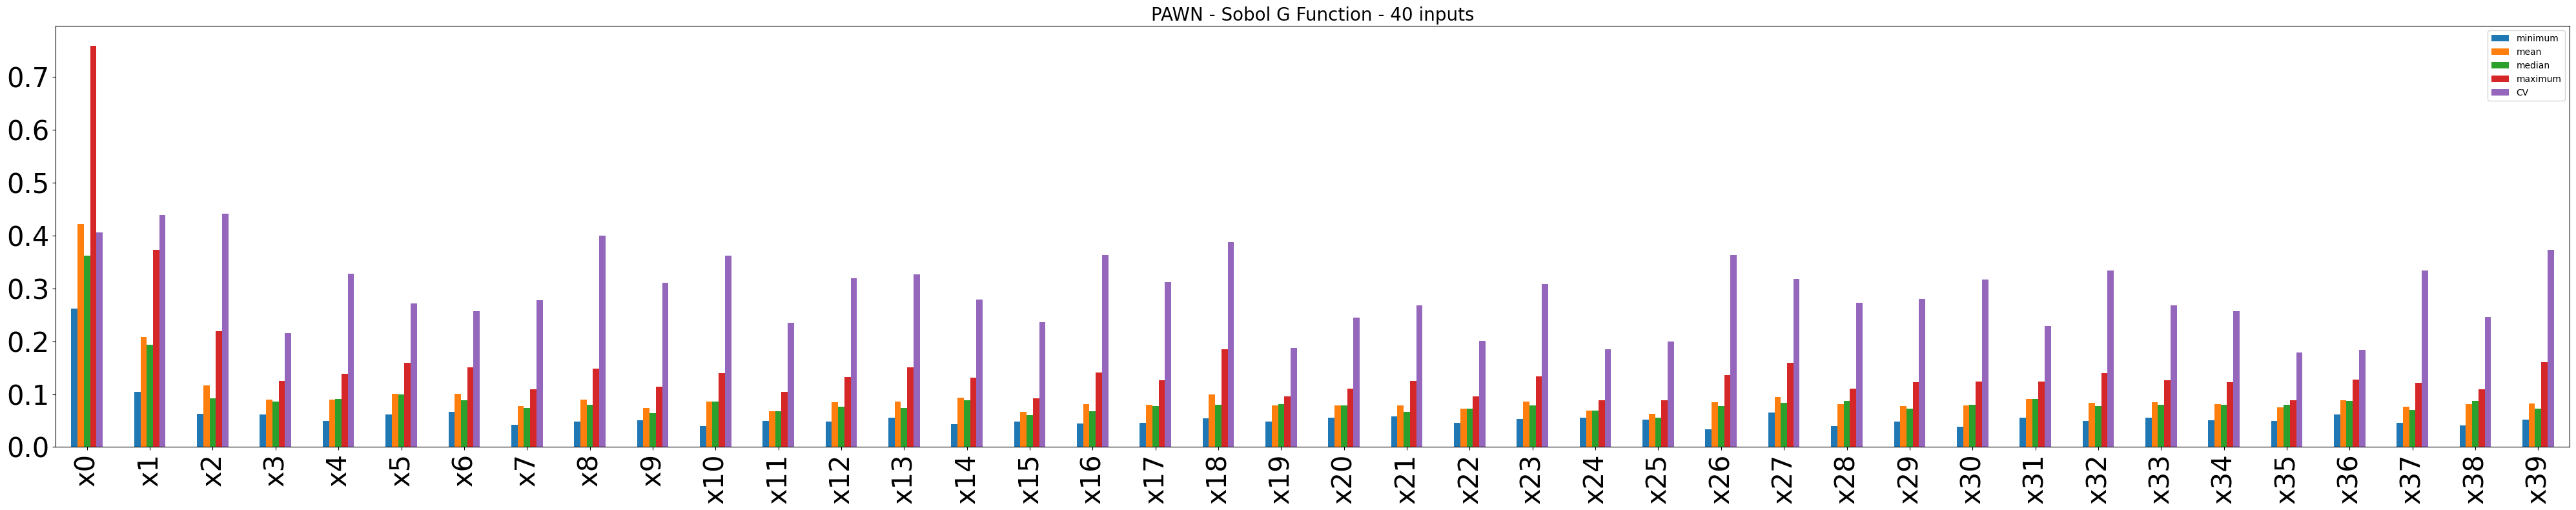

In [40]:
%%time
pawn_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

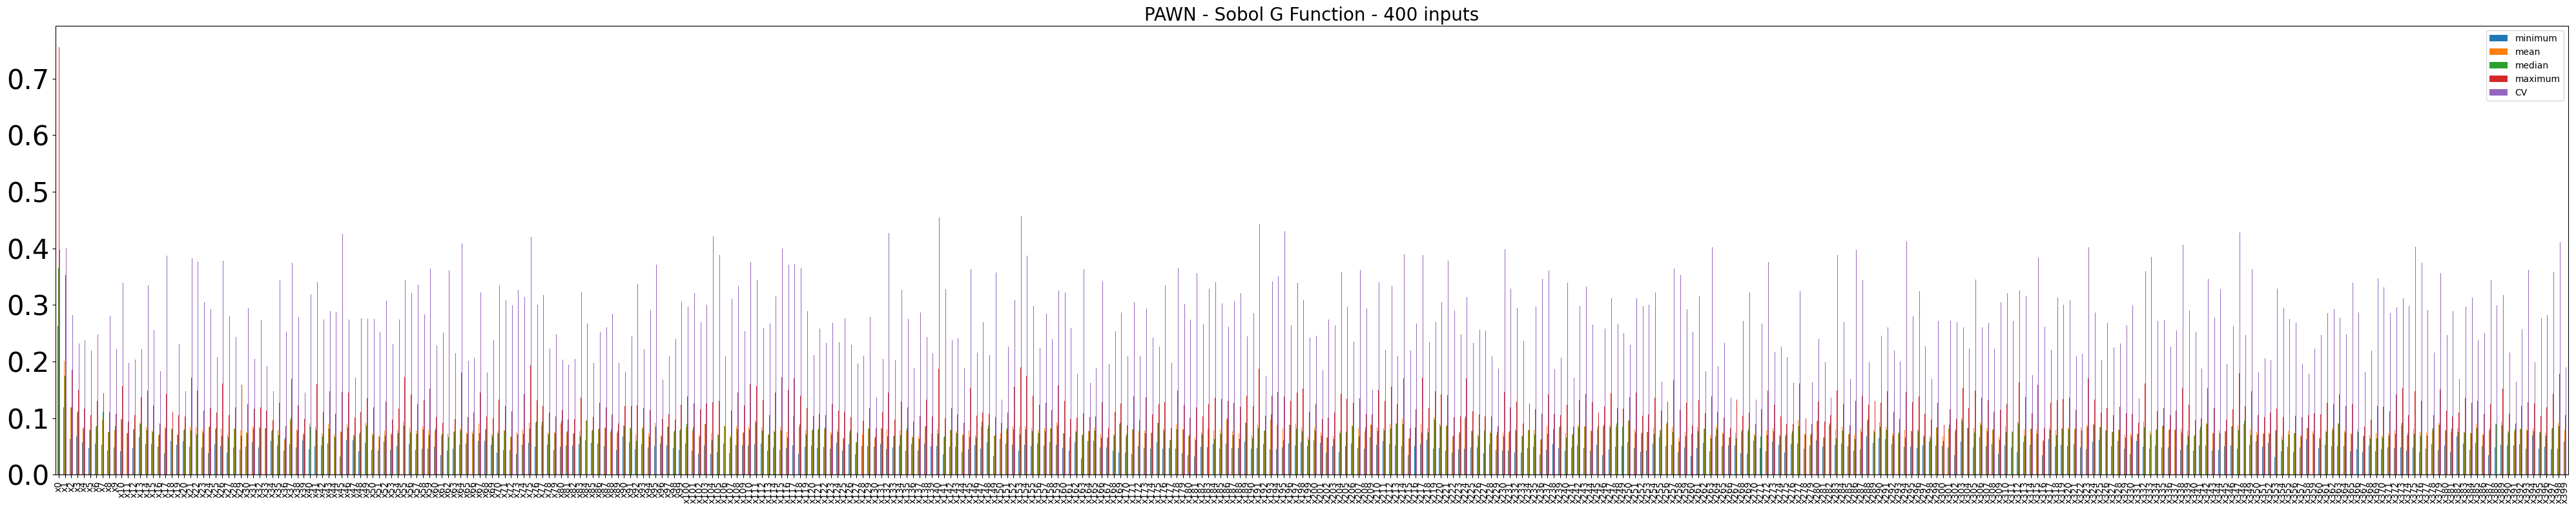

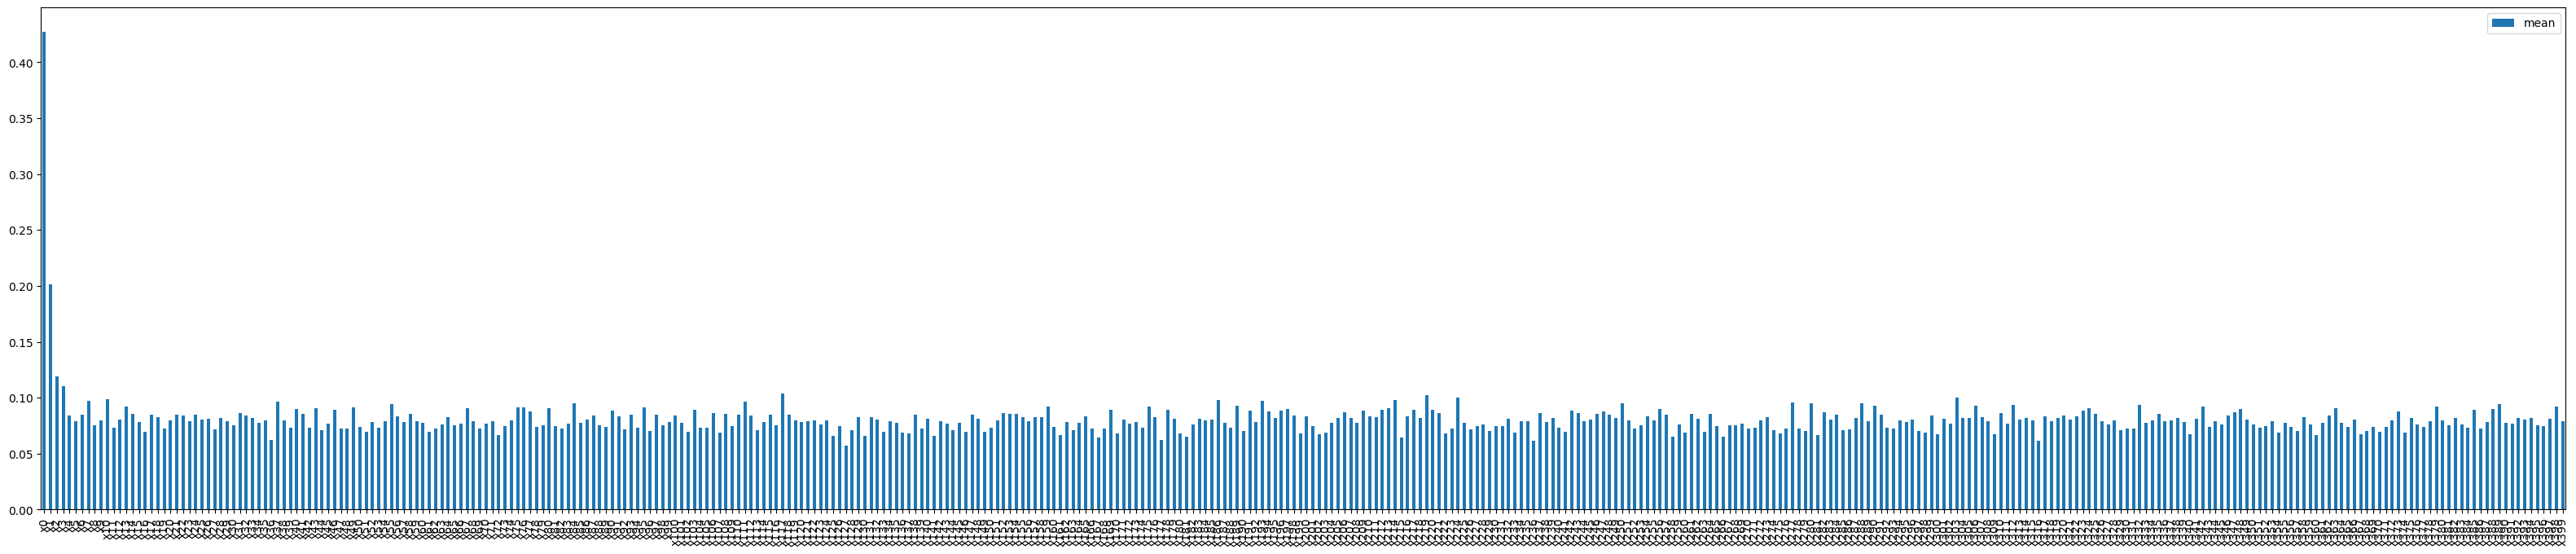

In [70]:
%%time
pawn_sobol_g(400, sp_400, a_arr_400, delta_arr_400)

# Method of Morris

In [ ]:
# ==== Method of Morris ~ Sobol G-Function ===
def morris_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list):

    (sp.sample_morris(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_morris())
    
    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    # axes[0].set_yscale('log') # set plot to log scale
    # axes[1].set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"Method of Morris - Sobol G Function - {n} inputs")
    plt.tight_layout()

    sp.heatmap(title=f"Method of Morris - {n} inputs ")

morris_sobol_g(4, sp_4, a_arr_4, delta_arr_4)
morris_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

In [ ]:
%%time
morris_sobol_g(400, sp_400, a_arr_400, delta_arr_400)